In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm, uniform, binom, expon
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
df_clean = df.copy()

In [15]:
#fill null in director
df_clean['director'] = df_clean['director'].fillna('Unknown')
#fill null in cast
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
#fill null in country
df_clean['country'] = df_clean['country'].fillna('Unknown')
#Convert date into date/time
df_clean['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df_clean['date_added'] = df_clean['date_added'].fillna('Unknown')
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
clean_df = df_clean.dropna(subset=['rating', 'duration']).reset_index(drop=True)
df = clean_df.copy()

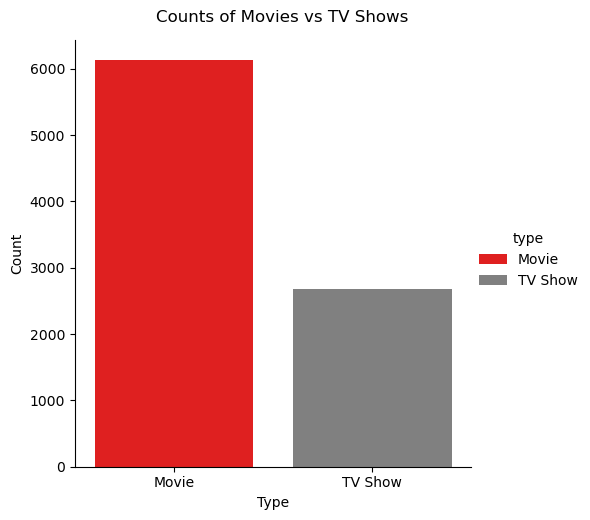

In [21]:
#Count shows vs movies
colors={"Movie":"red", "TV Show" : "grey"}
g = sns.catplot(data=df, x='type', kind='count', hue="type", palette=colors, legend=True)
g.fig.suptitle("Counts of Movies vs TV Shows", y=1.03)
g.set(xlabel="Type", ylabel="Count")

Average movie duration: 99.58 minutes
Average TV show duration: 1.77 seasons


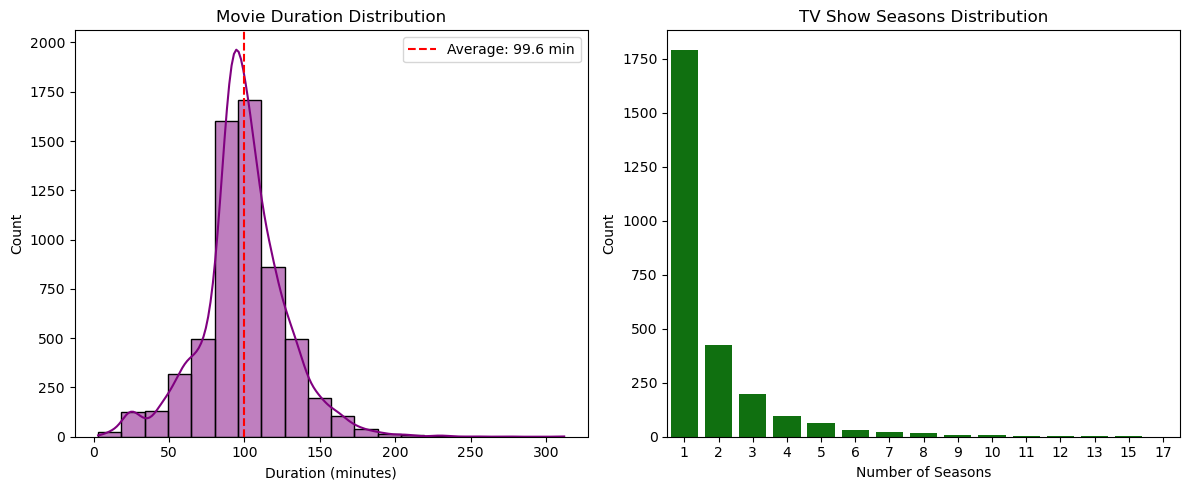

In [27]:
# Create a function to extract numeric values and identify the unit
def extract_duration_info(duration_str):
    if pd.isna(duration_str):
        return None, None
    
    match = re.search(r'(\d+)\s*(\w+)', str(duration_str))
    if match:
        value = int(match.group(1))
        unit = match.group(2)
        if unit == 'Season' or unit == 'Seasons':
            return value, 'Seasons'
        elif unit == 'min':
            return value, 'min'
    return None, None

# Apply the function to create new columns
df['duration_value'] = df['duration'].apply(lambda x: extract_duration_info(x)[0])
df['duration_unit'] = df['duration'].apply(lambda x: extract_duration_info(x)[1])

# Now, analyze properly by separating movies and TV shows
movies_df = df[df['duration_unit'] == 'min']
shows_df = df[df['duration_unit'] == 'Seasons']

# Calculate averages
avg_movie_duration = movies_df['duration_value'].mean()
avg_show_duration = shows_df['duration_value'].mean()

print(f"Average movie duration: {avg_movie_duration:.2f} minutes")
print(f"Average TV show duration: {avg_show_duration:.2f} seasons")



# Create visualizations
plt.figure(figsize=(12, 5))

# Movie duration histogram
plt.subplot(1, 2, 1)
sns.histplot(movies_df['duration_value'].dropna(), bins=20, kde=True,color="purple")
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.axvline(avg_movie_duration, color='red', linestyle='--', 
           label=f'Average: {avg_movie_duration:.1f} min')
plt.legend()

# TV Show seasons distribution
plt.subplot(1, 2, 2)
season_counts = shows_df['duration_value'].value_counts().sort_index()
sns.barplot(x=season_counts.index, y=season_counts.values, color="green")
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Durations'), Text(0, 0.5, 'Movies Count')]

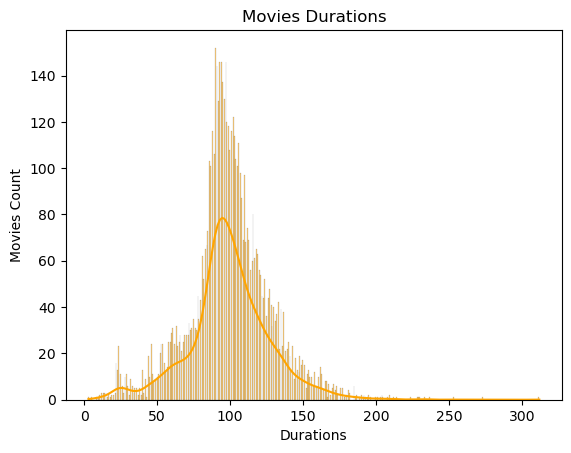

In [29]:
#Plot histogram of movie durations
g = sns.histplot(movies_df['duration_value'], bins=500, kde=True, color="orange")
g.set_title("Movies Durations")
g.set(xlabel="Durations", ylabel="Movies Count")

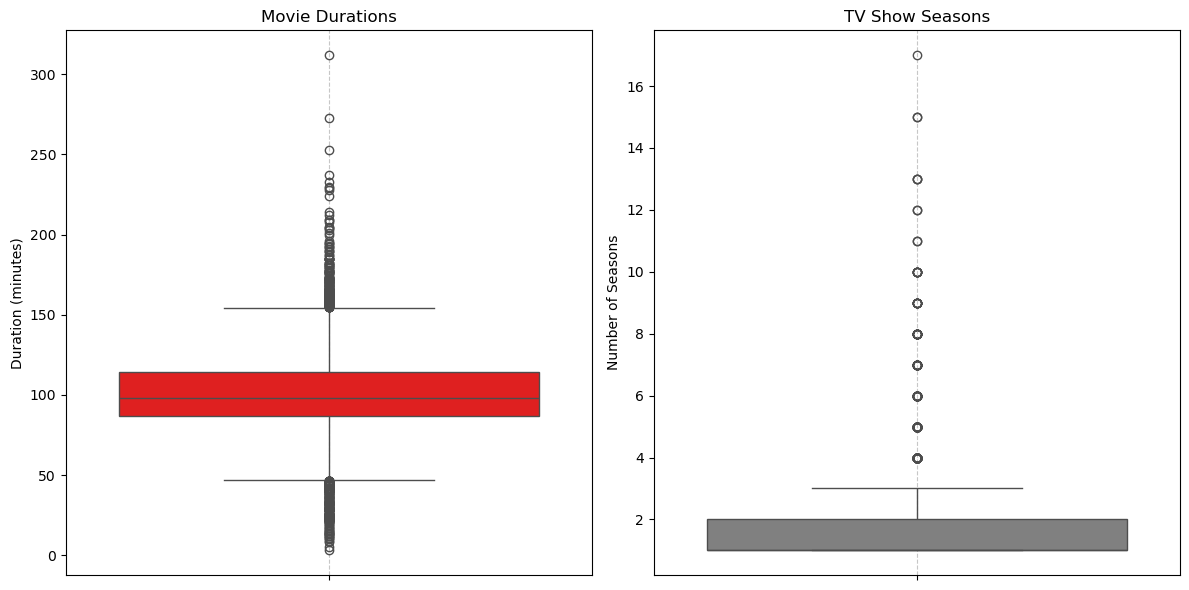

In [31]:
#Boxplot for duration per content type
plt.figure(figsize=(12, 6))

# Movie durations boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='duration_value', data=movies_df, color="red")
plt.title('Movie Durations')
plt.ylabel('Duration (minutes)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add TV show durations in the second subplot
plt.subplot(1, 2, 2)
sns.boxplot(y='duration_value', data=shows_df, color="grey")
plt.title('TV Show Seasons')
plt.ylabel('Number of Seasons')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [67]:
#Use IQR to detect outlier durations Movies
movies_df = df.copy()

from scipy.stats import iqr
q1_movies = np.quantile(movies_df['duration_value'], 0.25)
q3_movies = np.quantile(movies_df['duration_value'], 0.75)
iqr_movies = q3_movies - q1_movies
print(f"Q1: {q1_movies}")
print(f"Q3: {q3_movies}")
print(f"IQR: {iqr_movies}")

# Calculate lower and upper bounds for outliers
lower_bound_movies = q1_movies - 1.5 * iqr_movies
upper_bound_movies = q3_movies + 1.5 * iqr_movies
print(f"Lower bound: {lower_bound_movies}")
print(f"Upper bound: {upper_bound_movies}")

# Identify outliers
outliers_movies = movies_df[(movies_df['duration_value'] < lower_bound_movies) | (movies_df['duration_value'] > upper_bound_movies)]
normal_movies = movies_df[(movies_df['duration_value'] >= lower_bound_movies) & (movies_df['duration_value'] <= upper_bound_movies)]

# Count outliers
print(f"Number of outlier movies: {len(outliers_movies)} ({len(outliers_movies)/len(movies_df)*100:.2f}%)")
print(f"Number of normal movies: {len(normal_movies)} ({len(normal_movies)/len(movies_df)*100:.2f}%)")

# Create a flag for outliers
movies_df['is_outlier'] = ((movies_df['duration_value'] < lower_bound_movies) | (movies_df['duration_value'] > upper_bound_movies))

Q1: 2.0
Q3: 106.0
IQR: 104.0
Lower bound: -154.0
Upper bound: 262.0
Number of outlier movies: 2 (0.02%)
Number of normal movies: 8798 (99.98%)


In [69]:
#Use IQR to detect outlier durations TV Shows
shows_df = df.copy()
from scipy.stats import iqr
q1_shows = np.quantile(shows_df['duration_value'], 0.25)
q3_shows = np.quantile(shows_df['duration_value'], 0.75)
iqr_shows = q3_shows - q1_shows
print(f"Q1: {q1_shows}")
print(f"Q3: {q3_shows}")
print(f"IQR: {iqr_shows}")

# Calculate lower and upper bounds for outliers
lower_bound_shows = q1_shows - 1.5 * iqr_shows
upper_bound_shows = q3_shows + 1.5 * iqr_shows
print(f"Lower bound: {lower_bound_shows}")
print(f"Upper bound: {upper_bound_shows}")

# Identify outliers
outliers_shows = shows_df[(shows_df['duration_value'] < lower_bound_shows) | (shows_df['duration_value'] > upper_bound_shows)]
normal_shows = shows_df[(shows_df['duration_value'] >= lower_bound_shows) & (shows_df['duration_value'] <= upper_bound_shows)]

# Count outliers
print(f"Number of outlier TV shows: {len(outliers_shows)} ({len(outliers_shows)/len(shows_df)*100:.2f}%)")
print(f"Number of normal TV shows: {len(normal_shows)} ({len(normal_shows)/len(shows_df)*100:.2f}%)")

# Create a flag for outliers
shows_df['is_outlier'] = ((shows_df['duration_value'] < lower_bound_shows) | (shows_df['duration_value'] > upper_bound_shows))

Q1: 2.0
Q3: 106.0
IQR: 104.0
Lower bound: -154.0
Upper bound: 262.0
Number of outlier TV shows: 2 (0.02%)
Number of normal TV shows: 8798 (99.98%)


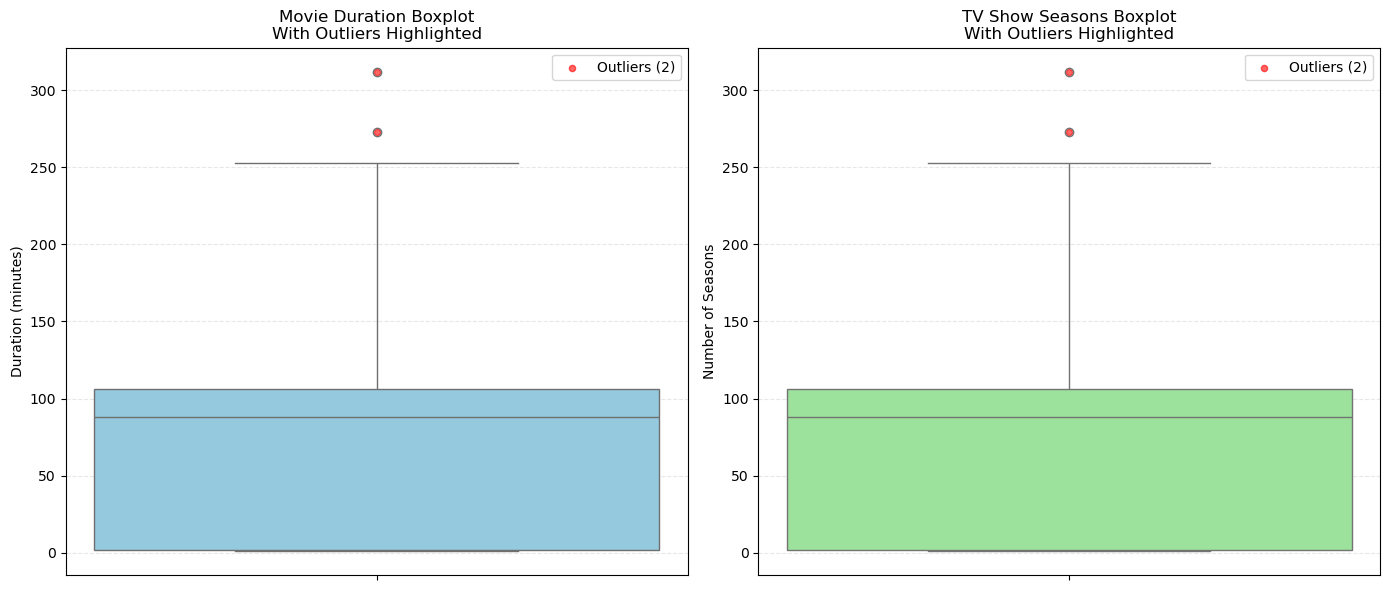

In [71]:
plt.figure(figsize=(14, 6))

# Movie durations boxplot
plt.subplot(1, 2, 1)
# Regular boxplot
sns.boxplot(y='duration_value', data=movies_df, color='skyblue')

# Highlight the outliers with a scatter plot
outlier_points = movies_df[movies_df['is_outlier']]
plt.scatter(
    x=np.zeros(len(outlier_points)),  # All at x-position 0
    y=outlier_points['duration_value'],
    color='red',
    s=20,
    alpha=0.6,
    label=f'Outliers ({len(outlier_points)})'
)

plt.title('Movie Duration Boxplot\nWith Outliers Highlighted')
plt.ylabel('Duration (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()

# TV Show seasons boxplot
plt.subplot(1, 2, 2)
# Regular boxplot
sns.boxplot(y='duration_value', data=shows_df, color='lightgreen')

# Highlight the outliers with a scatter plot
outlier_points = shows_df[shows_df['is_outlier']]
plt.scatter(
    x=np.zeros(len(outlier_points)),  # All at x-position 0
    y=outlier_points['duration_value'],
    color='red',
    s=20,
    alpha=0.6,
    label=f'Outliers ({len(outlier_points)})'
)

plt.title('TV Show Seasons Boxplot\nWith Outliers Highlighted')
plt.ylabel('Number of Seasons')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


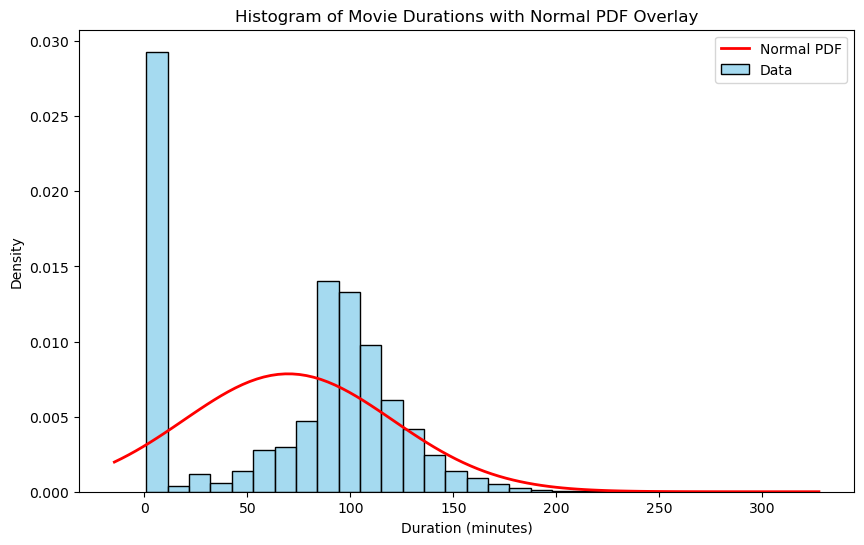

In [73]:
from scipy.stats import norm
# Calculate mean and std
mu = movies_df['duration_value'].mean()
sigma = movies_df['duration_value'].std()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_value'], bins=30, kde=False, stat='density', color='skyblue', label='Data')

# Overlay normal PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2, label='Normal PDF')

plt.title('Histogram of Movie Durations with Normal PDF Overlay')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [75]:
# CDF for 90 min using fitted normal distribution
percent_less_90 = norm.cdf(90, mu, sigma)
print(f"Approx. {percent_less_90*100:.2f}% of movies are shorter than 90 minutes (according to normal fit)")

# Alternatively, empirical percentage:
empirical = (movies_df['duration_value'] < 90).mean()
print(f"Empirical: {empirical*100:.2f}% of movies are actually shorter than 90 minutes")

Approx. 65.41% of movies are shorter than 90 minutes (according to normal fit)
Empirical: 51.26% of movies are actually shorter than 90 minutes


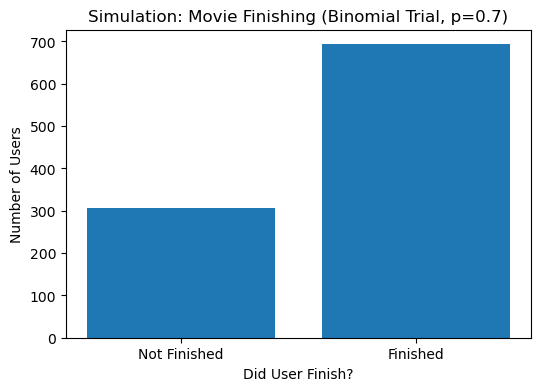

693 out of 1000 users finished the movie (69.30%)


In [77]:
from scipy.stats import binom
n_users = 1000
p_finish = 0.7

# Simulate: 1 if finished, 0 if not (size=1000 users)
simulated = binom.rvs(n=1, p=p_finish, size=n_users)

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(simulated, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Not Finished', 'Finished'])
plt.xlabel('Did User Finish?')
plt.ylabel('Number of Users')
plt.title('Simulation: Movie Finishing (Binomial Trial, p=0.7)')
plt.show()

# Optionally, show actual proportions
finished_count = np.sum(simulated)
print(f"{finished_count} out of {n_users} users finished the movie ({finished_count/n_users*100:.2f}%)")

Probability a user watches 0 shows: 0.0067 → Expected users: 6.7
Probability a user watches 10 shows: 0.0181 → Expected users: 18.1


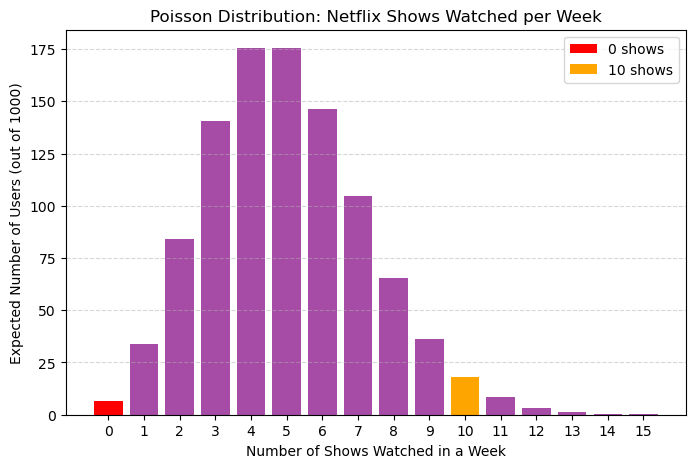

In [79]:
from scipy.stats import poisson
# Parameters
lam = 5   # average shows watched per week
n_users = 1000

# Probability mass function for 0 and 10 shows
p_0 = poisson.pmf(0, lam)
p_10 = poisson.pmf(10, lam)

# Expected number of users watching 0 and 10 shows
n_0 = p_0 * n_users
n_10 = p_10 * n_users

print(f"Probability a user watches 0 shows: {p_0:.4f} → Expected users: {n_0:.1f}")
print(f"Probability a user watches 10 shows: {p_10:.4f} → Expected users: {n_10:.1f}")

# Plotting the Poisson distribution
x = np.arange(0, 16)
probs = poisson.pmf(x, lam)

plt.figure(figsize=(8,5))
plt.bar(x, probs * n_users, color='purple', alpha=0.7)
plt.xlabel('Number of Shows Watched in a Week')
plt.ylabel('Expected Number of Users (out of 1000)')
plt.title('Poisson Distribution: Netflix Shows Watched per Week')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Highlight bars for 0 and 10
plt.bar(0, p_0 * n_users, color='red', label='0 shows')
plt.bar(10, p_10 * n_users, color='orange', label='10 shows')
plt.legend()
plt.show()

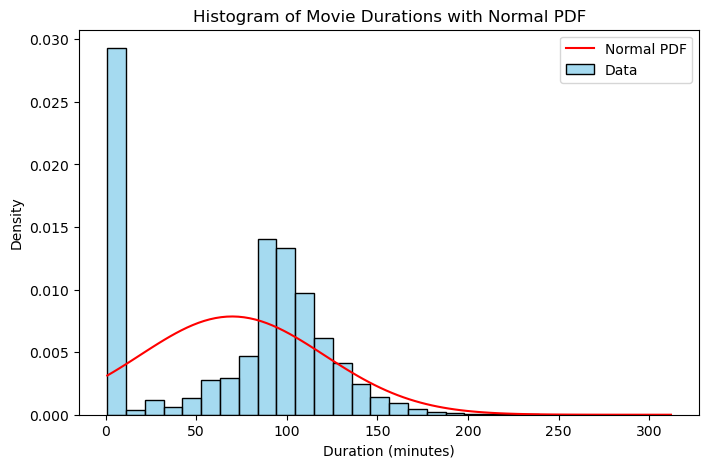

In [81]:
from scipy.stats import norm

mu = movies_df['duration_value'].mean()
sigma = movies_df['duration_value'].std()

plt.figure(figsize=(8,5))
sns.histplot(movies_df['duration_value'], bins=30, kde=False, stat='density', color='skyblue', label='Data')
x = np.linspace(movies_df['duration_value'].min(), movies_df['duration_value'].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal PDF')
plt.title('Histogram of Movie Durations with Normal PDF')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

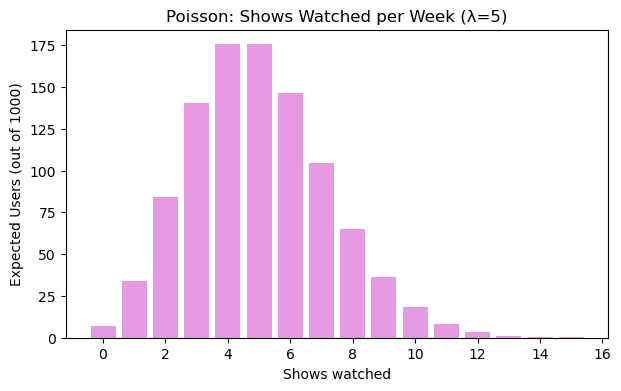

In [83]:
from scipy.stats import poisson

lam = 5
users = 1000
x = np.arange(0, 16)
probs = poisson.pmf(x, lam)
plt.figure(figsize=(7,4))
plt.bar(x, probs * users, color='orchid', alpha=0.7)
plt.title('Poisson: Shows Watched per Week (λ=5)')
plt.xlabel('Shows watched')
plt.ylabel('Expected Users (out of 1000)')
plt.show()

/var/folders/pm/8pbgcwgj11lg9k16sfnzp2400000gn/T/ipykernel_3439/3209059427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sim, palette='pastel')


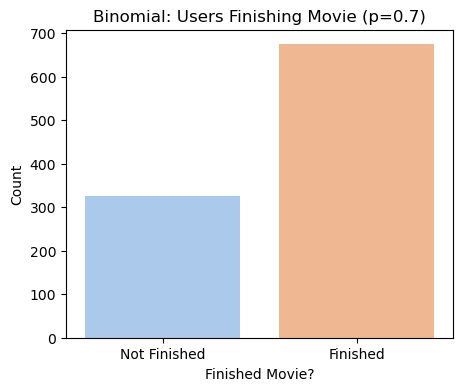

In [85]:
from scipy.stats import binom

n_users = 1000
p_finish = 0.7
sim = binom.rvs(1, p_finish, size=n_users)
plt.figure(figsize=(5,4))
sns.countplot(x=sim, palette='pastel')
plt.xticks([0, 1], ['Not Finished', 'Finished'])
plt.title('Binomial: Users Finishing Movie (p=0.7)')
plt.xlabel('Finished Movie?')
plt.ylabel('Count')
plt.show()

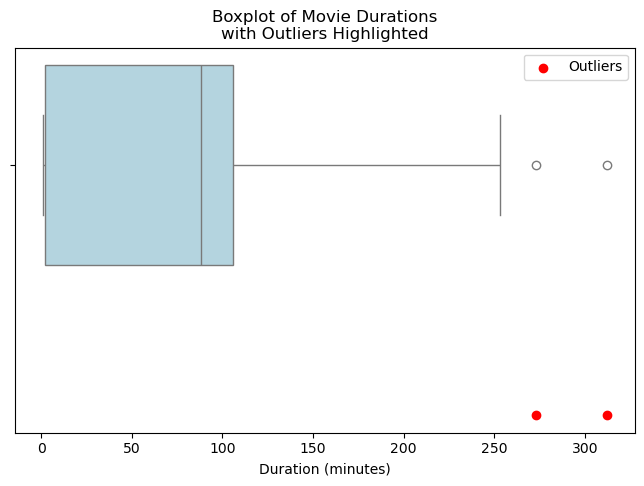

In [87]:
# Make sure you have outlier detection done and a column 'is_outlier' in movies_df
plt.figure(figsize=(8,5))
sns.boxplot(x=movies_df['duration_value'], color='lightblue')
# Overlay outliers in red
outliers = movies_df[movies_df['is_outlier']]
plt.scatter(outliers['duration_value'], np.ones(len(outliers)), 
            color='red', label='Outliers', zorder=10)
plt.title('Boxplot of Movie Durations\nwith Outliers Highlighted')
plt.xlabel('Duration (minutes)')
plt.legend()
plt.show()

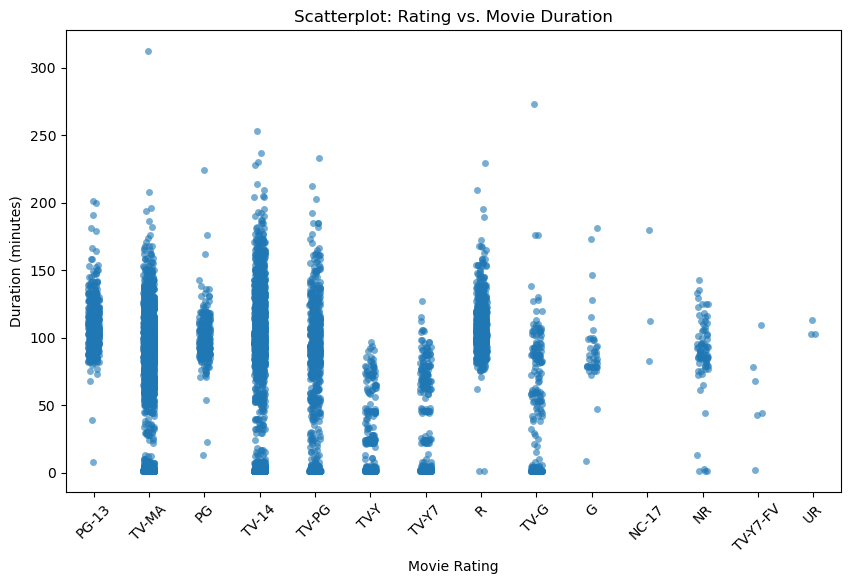

In [89]:
plt.figure(figsize=(10,6))
sns.stripplot(x='rating', y='duration_value', data=movies_df, jitter=True, alpha=0.6)
plt.title('Scatterplot: Rating vs. Movie Duration')
plt.xlabel('Movie Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()